**TELCO CUSTOMERS CHURN**

Muh Amri Sidiq

**Introduction**

In the highly competitive telecommunications industry, customer retention is critical for business sustainability. Understanding the factors leading to customer churn and developing predictive models can empower companies to proactively address potential churners, optimize customer experience, and maximize revenue.

The Telco Customer Churn dataset provides rich information about customer demographics, account details, and usage patterns. These variables are crucial for identifying behavioral trends and predicting churn. However, due to the complexity and variability of customer behavior, developing an accurate and robust prediction model requires advanced techniques.

This project leverages ensemble learning techniques to predict customer churn effectively. Ensemble models are powerful as they combine the strengths of multiple base learners to improve prediction accuracy and generalizability

**Import Data**

To kickstart our project, we sourced the dataset directly from Kaggle, a hub for high-quality datasets and challenges. With a simple script, the data is downloaded and loaded into our environment, ready for exploration and analysis. This step ensures we have a robust starting point for building powerful machine learning models

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


**Import Library**

In this step, we import essential Python libraries for data manipulation, visualization, and machine learning. Libraries like Pandas and NumPy power our data handling, Matplotlib and Seaborn enable insightful visualizations, while scikit-learn, Randomforest, and other ML libraries provide robust tools for model development. These imports lay the groundwork for a seamless machine learning workflow

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

**Load Data**

The dataset is loaded into a Pandas DataFrame for easy manipulation and exploration. At this stage, we ensure the data is structured correctly, ready for preprocessing and analysis. A quick preview using .head() gives us a snapshot of the data, helping to identify key columns and potential cleaning steps

In [ ]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(file_path)

WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploratory Data Analysis**

EDA is a critical step in understanding the dataset. Using Python libraries like Pandas, Seaborn, and Matplotlib, we analyze distributions, identify patterns, and detect anomalies. Visualizations such as histograms, box plots, and heatmaps reveal relationships between features and the target variable, setting the stage for effective feature engineering and model building

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From comand prompt above we have 7043 row and 21 columns

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Target us is `Churn`, we can see target not balance

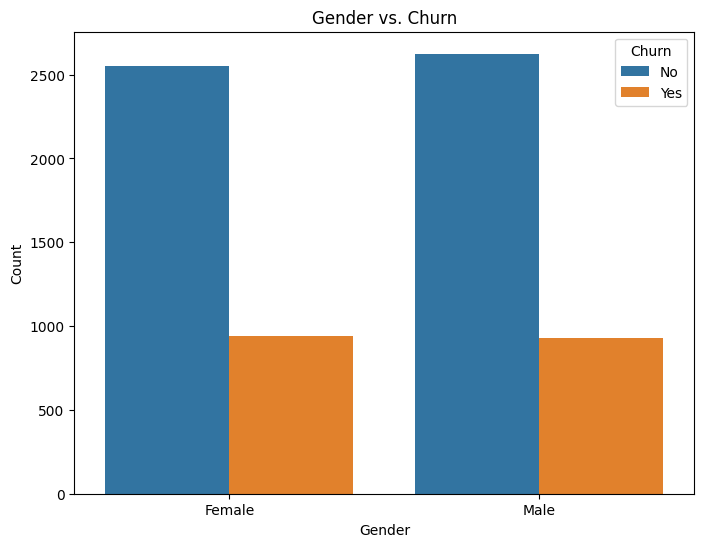

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

almost same `Churn` no with `gender` male and female

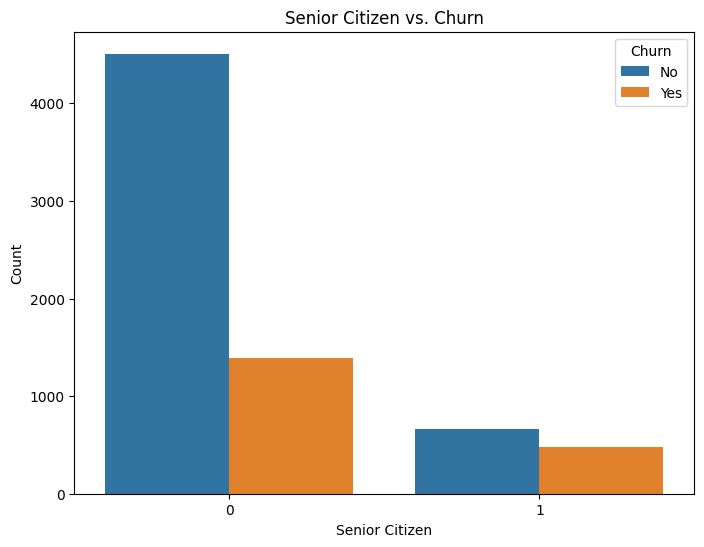

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Senior Citizen vs. Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `SeniorCitizen` 0 bigger than Count `Churn` No with `SeniorCitizen` 1

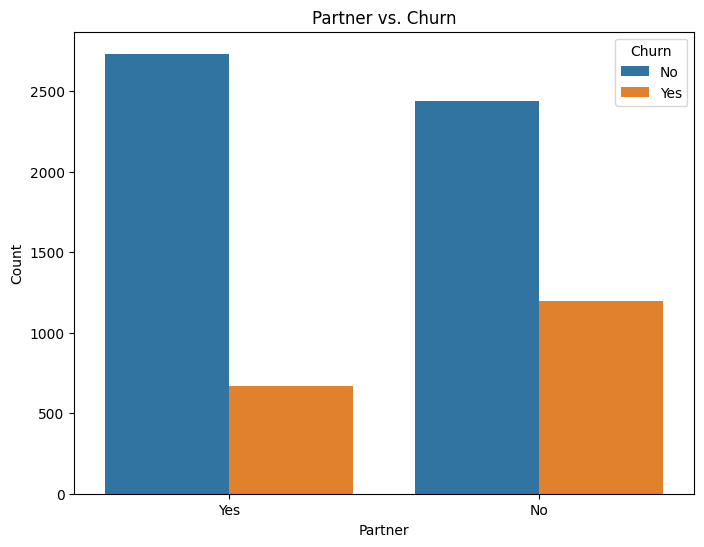

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Partner vs. Churn')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `Partner` No bigger than Count `Churn` Yes with `Partner` 1

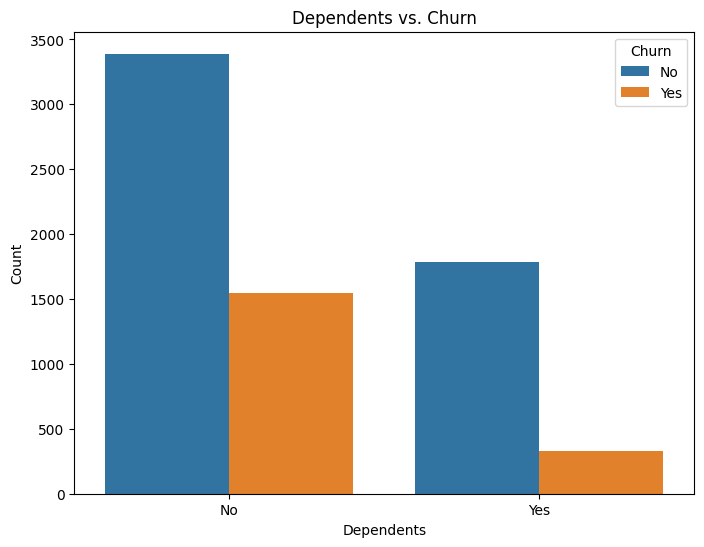

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Dependents vs. Churn')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `Dependents` No bigger than Count `Churn` Yes with `Dependents` Yes

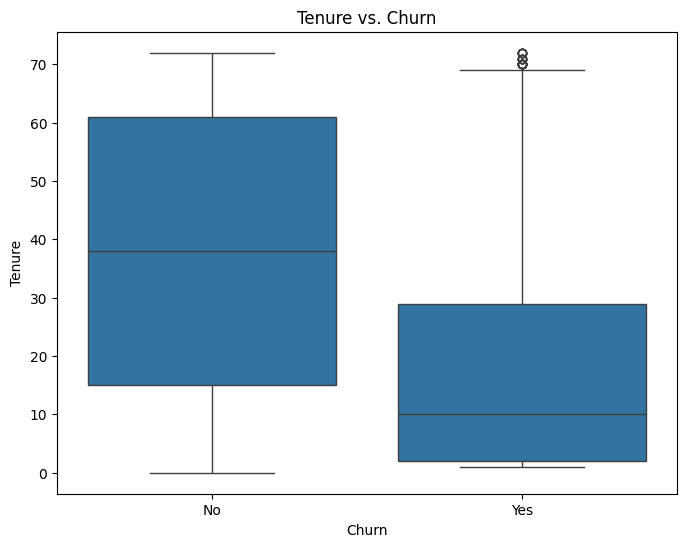

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

`Churn` Yes have `Tenure` median 10 and have outliers until `Tenure` 70, `Churn` NO have `Tenure` median 39 and no have outliers

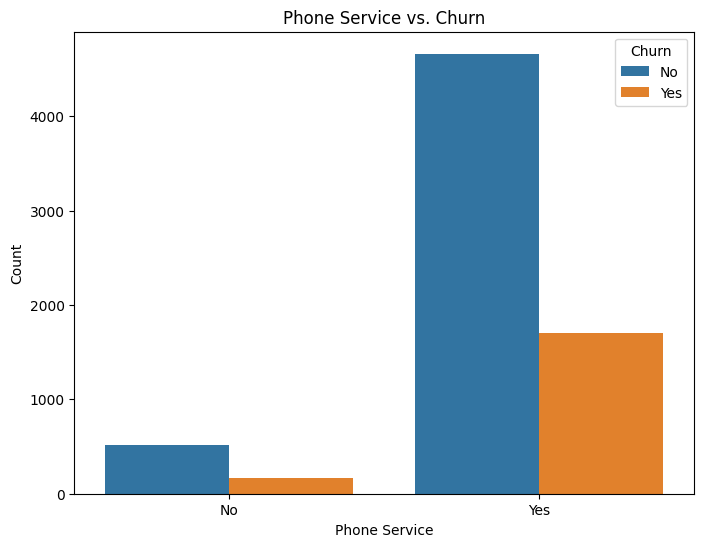

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Phone Service vs. Churn')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `PhoneService` Yes bigger than Count `Churn` Yes with `PhoneService` No

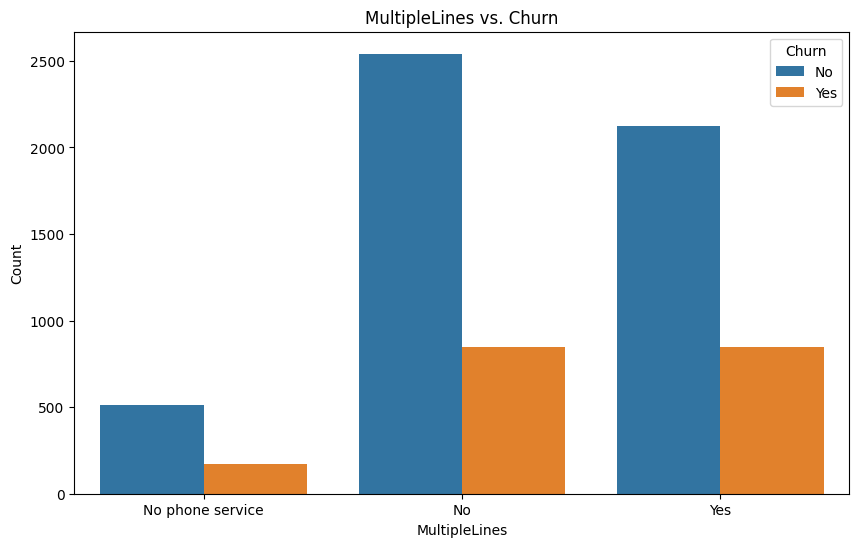

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('MultipleLines vs. Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `MultipleLines` No and Yes is same and more than Count `Churn` Yes with `MultipleLines` No Phone service

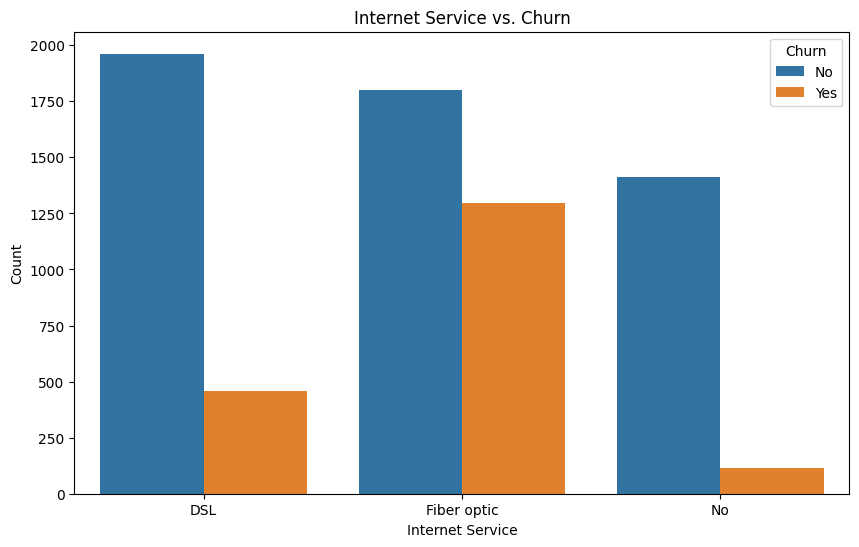

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service vs. Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `InternetService` Fiber Optic more than Count `Churn` Yes with `InternetService` No and DSL

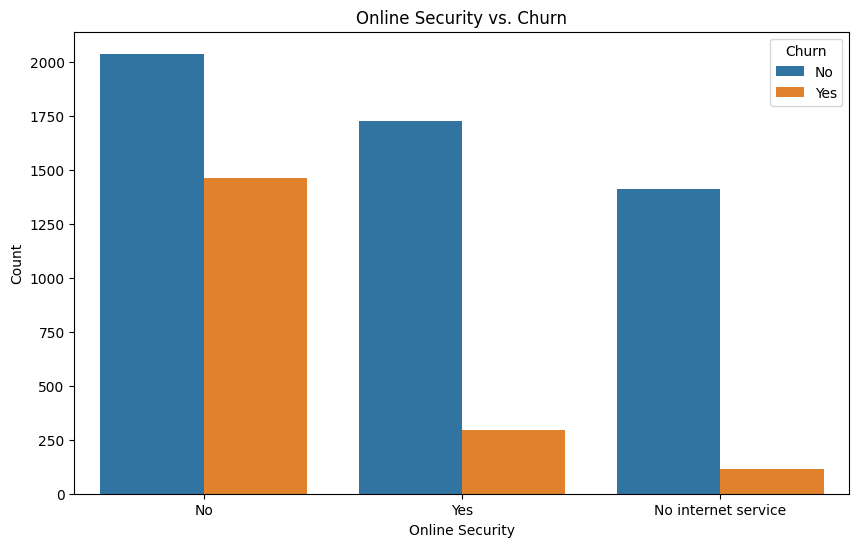

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Online Security vs. Churn')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `OnlineSecurity` No more than Count `Churn` Yes with `OnlineSecurity` No Internet service and Yes

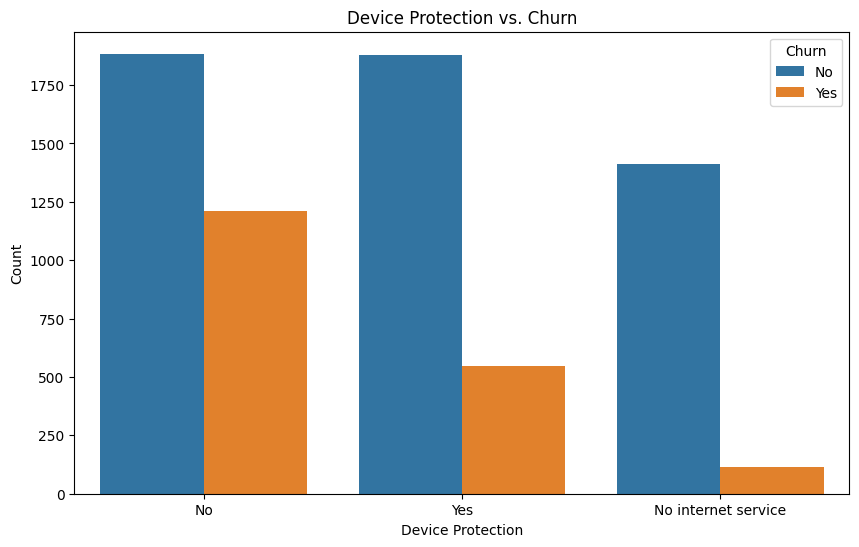

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Device Protection vs. Churn')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `DeviceProtection` No more than Count `Churn` Yes with `DeviceProtection` No Internet service and Yes

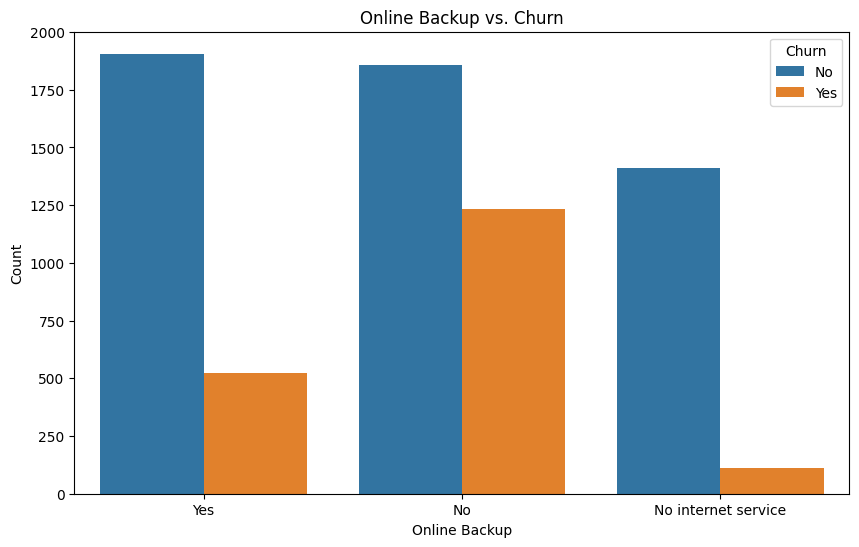

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Online Backup vs. Churn')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `OnlineBackup` No more than Count `Churn` Yes with `OnlineBackup` No Internet service and Yes

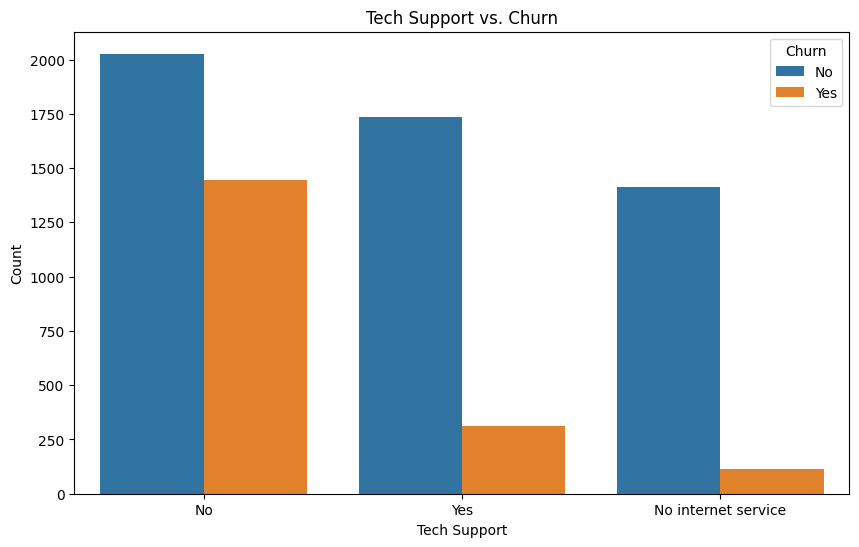

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Tech Support vs. Churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `TechSupport` No more than Count `Churn` Yes with `TechSupport` No Internet service and Yes

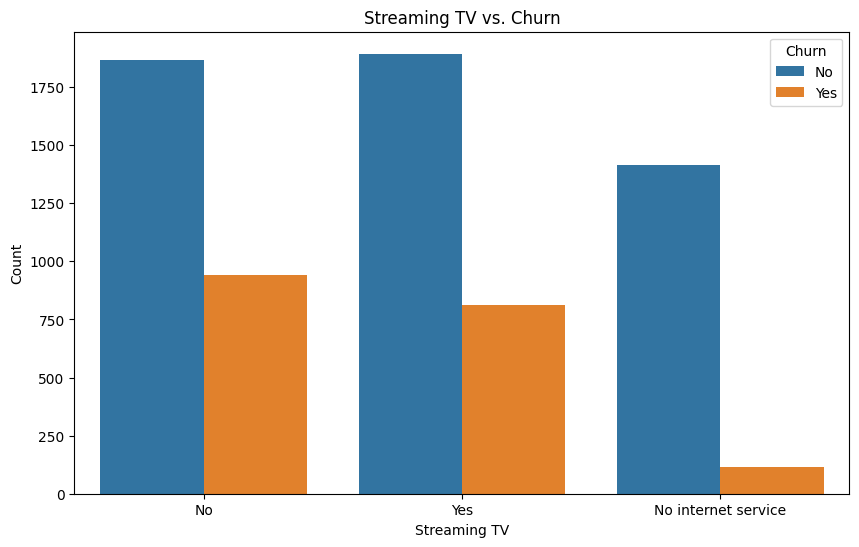

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Streaming TV vs. Churn')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `StreamingTV` No and Yes almost same and more than Count `Churn` Yes with `StreamingTV` No Internet service

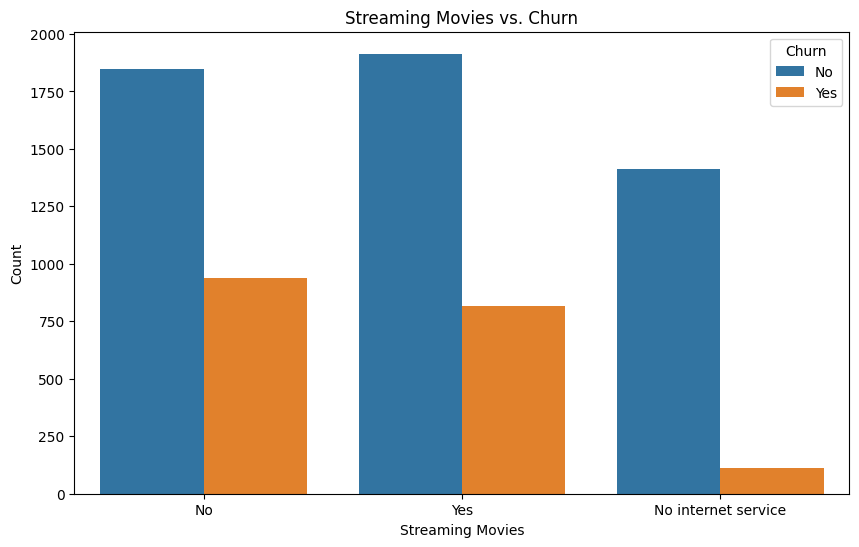

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('Streaming Movies vs. Churn')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `StreamingMovies` No and Yes almost same and more than Count `Churn` Yes with `StreamingMovies` No Internet service

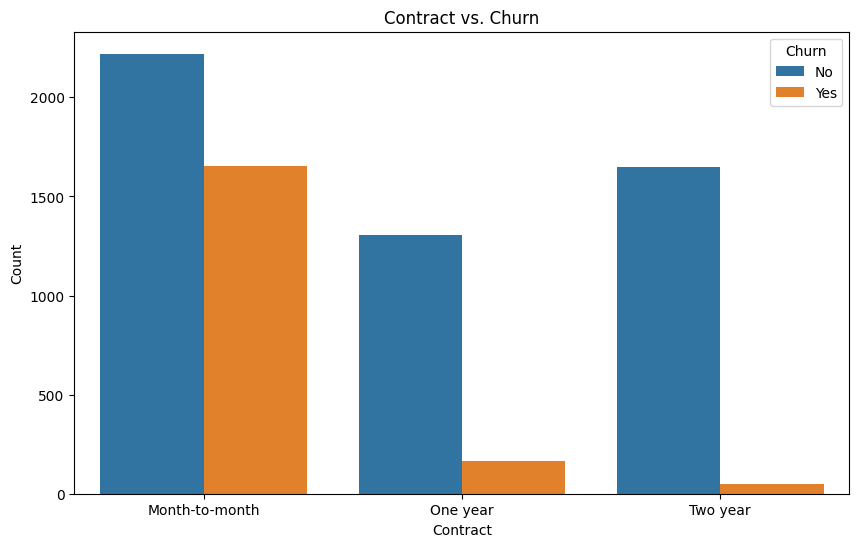

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract vs. Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `Contract` Month-to-month more than Count `Churn` Yes with `Contract` One year and Two year

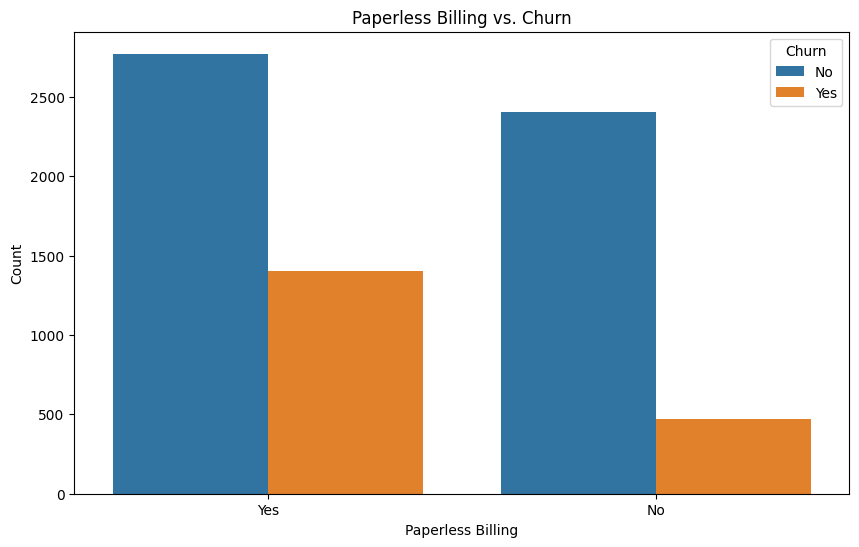

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Paperless Billing vs. Churn')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

Count `Churn` Yes with `PapperlessBilling` Yes more than Count `Churn` Yes with `PapperlessBilling` No

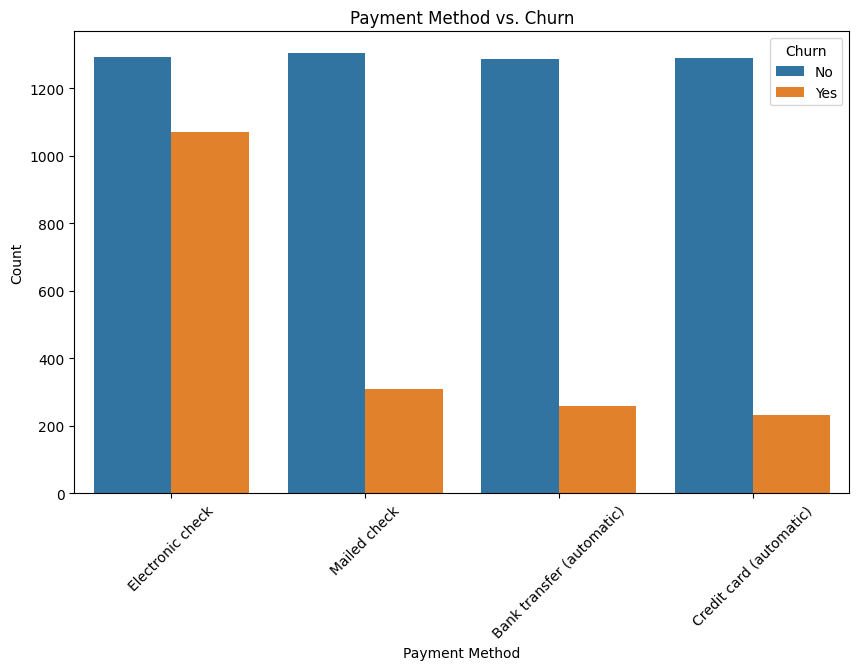

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs. Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Count `Churn` Yes with `PaymentMethod` Electronic check bigest than Count `Churn` Yes with `PaymentMethod` Mailed check, Bank transfer (automatic) and Credit card (automatic)

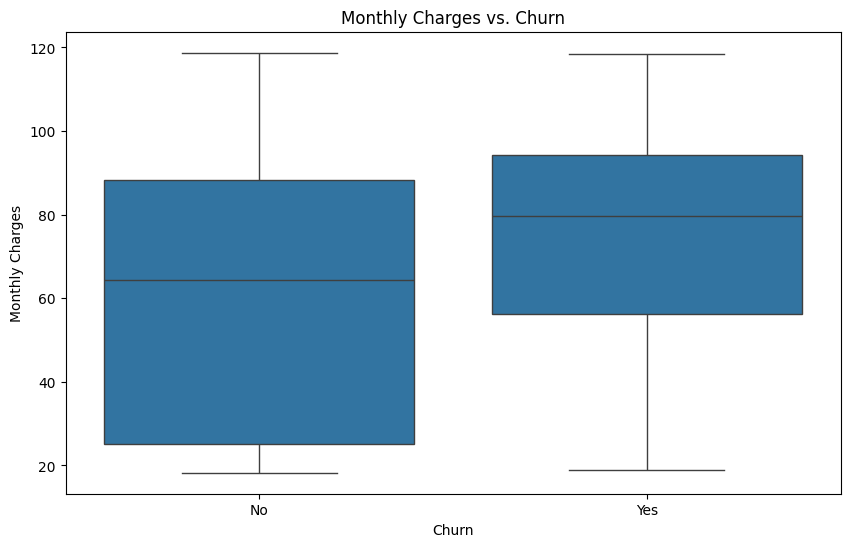

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

`Churn` Yes have median `MonthlyCharges` higher than `Churn` No

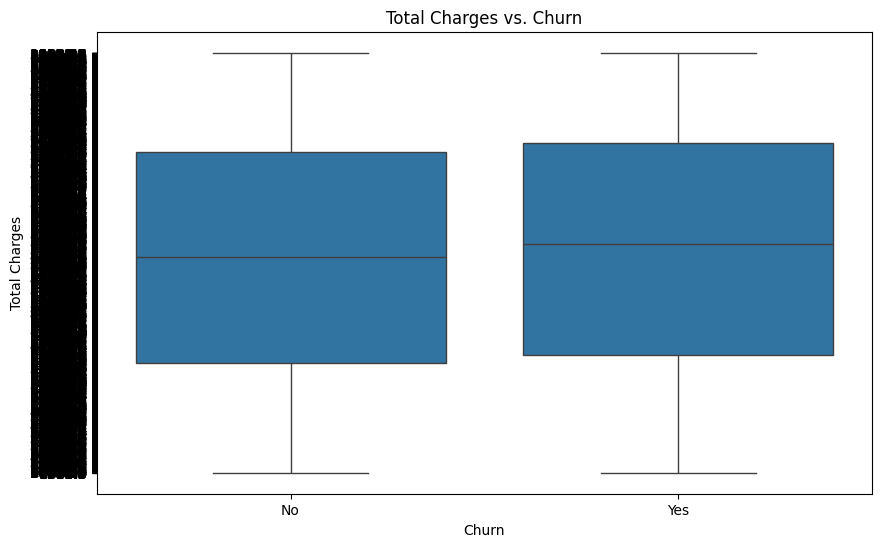

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

Almost same `Churn` Yes and no for `TotalCharges`

**Preparation Data**

Clean, well-structured data is key to building effective models. In this step, we handle missing values, encode categorical variables, scale numerical features, and address class imbalance using techniques like SMOTE. This meticulous preparation ensures the dataset is ready for accurate and reliable machine learning predictions

In [ ]:
df.duplicated().sum()

0

no duplicated data from above

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip().replace('', np.nan))

column `TotalCharges` type data is object, but actualy data is numeric

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


After change type data for column `TotalCharges` we have missing values

In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']):
  if df[col].isnull().any():
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

<ipython-input-55-8b407ac6e05d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


Fill missing values use median on column `TotalCharges`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check again, and finaly all data has clean from missing values

In [ ]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

For type data object change use LabelEncoder()

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
x = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Target column `Churn` is not balance, so we use SMOTE to change target to balance data

**K-Fold Cross Validation**

K-Fold Cross-Validation splits the dataset into multiple folds, training the model on different subsets and testing on unseen data. This technique minimizes overfitting and provides a comprehensive evaluation of model performance. By leveraging Python’s scikit-learn, we ensure that our model is both robust and generalizes well to new data

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

**Modeling**

In this phase, we develop and fine-tune machine learning models using powerful algorithms like Random Forest, Decision Tree, Gradient Boosting, and AdaBoost. With Python’s scikit-learn and other ML libraries, we train models, optimize hyperparameters, and evaluate their performance. The goal: a model that balances accuracy, precision, and recall to deliver actionable insights

Stacking Ensemble

Stacking ensemble takes machine learning to the next level by combining multiple models to leverage their individual strengths. In this step, base learners (e.g., Decission Tree, Gradient Boosting and Ada Boost) make predictions, and a meta-learner (e.g., RandomForest) learns from their outputs. Using Python’s scikit-learn and mlxtend, we build a powerful stacked model that improves accuracy and robustness

In [ ]:
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('ab', AdaBoostClassifier(n_estimators=50, random_state=42))
]

In [ ]:
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=RandomForestClassifier(n_estimators=500, random_state=42),
    cv=3
)

In [ ]:
stacking.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=42)),
                               ('ab', AdaBoostClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=500,
                                                          random_state=42))

In [ ]:
y_pred = stacking.predict(x_val)
print("Accuracy (Stacking with Random Forest Final Estimator):", accuracy_score(y_val, y_pred))

Accuracy (Stacking with Random Forest Final Estimator): 0.7784090909090909


From Above  prediction we have Accuracy Model is 78%

**Feature Importance**

Understanding which features impact predictions the most is crucial for both model optimization and business insights. Using Python libraries like scikit-learn we visualize feature importance. This step highlights the variables that matter most, providing transparency and guiding data-driven decisions

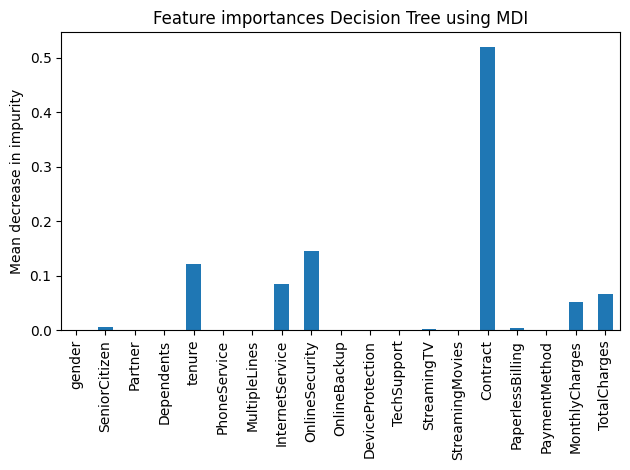

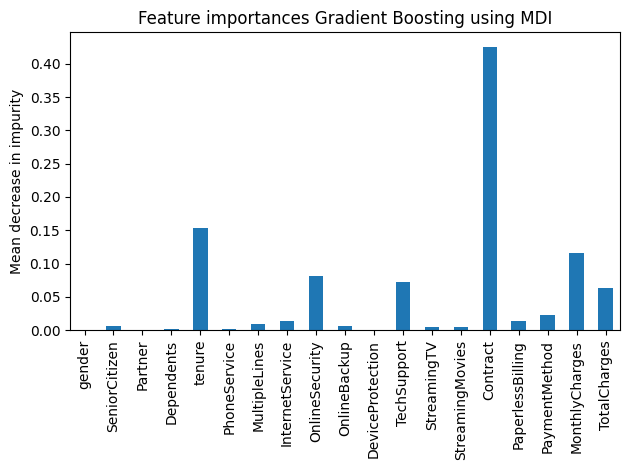

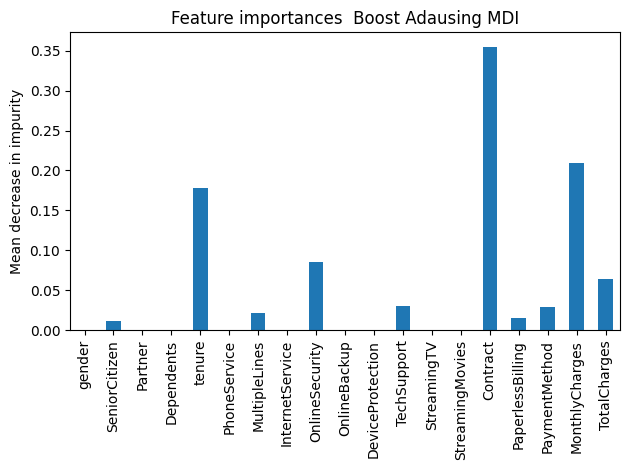

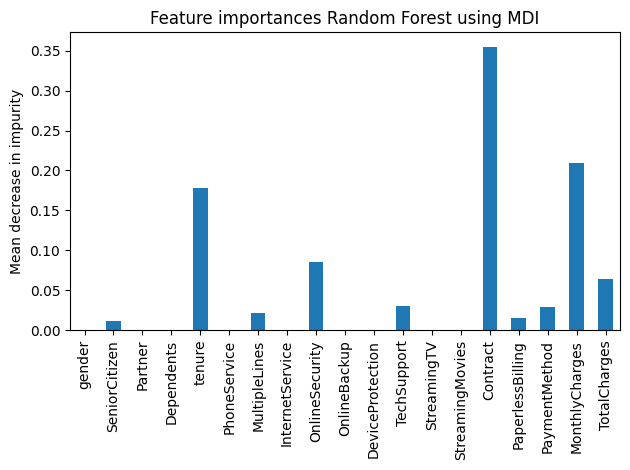

In [ ]:
importances = stacking.estimators_[0].feature_importances_
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=0, ax=ax)
ax.set_title("Feature importances Decision Tree using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Feature Importance for Gradient Boosting
importances = stacking.estimators_[1].feature_importances_
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=0, ax=ax)
ax.set_title("Feature importances Gradient Boosting using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Feature Importance for AdaBoost
importances = stacking.estimators_[2].feature_importances_
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=0, ax=ax)
ax.set_title("Feature importances  Boost Adausing MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Feature Importance for Random Forest (Final Estimator)
importances = stacking.final_estimator_.feature_importances_
feature_names = [est[0] for est in base_models]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=0, ax=ax)
ax.set_title("Feature importances Random Forest using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

From Feature Importance above , high MDI is column `contract`

  Feature  Importance
1      gb    0.513576
2      ab    0.299751
0      dt    0.186673


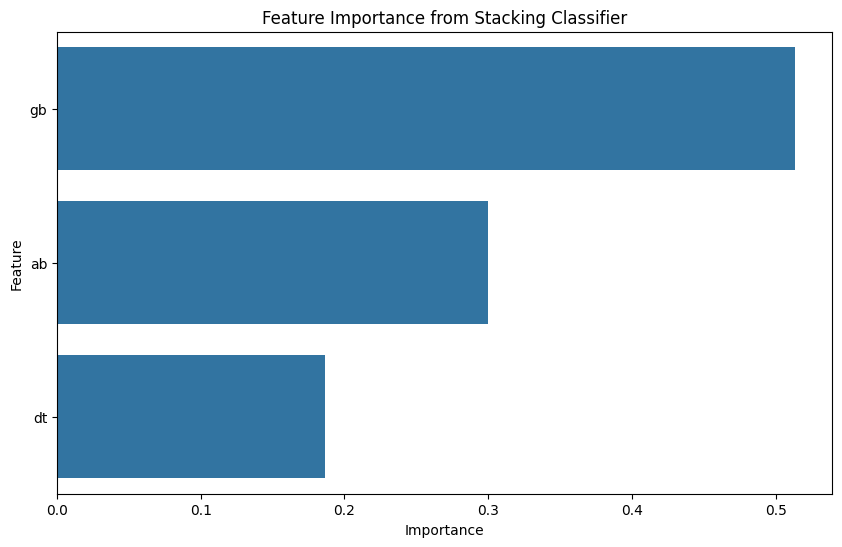

In [ ]:
importances = stacking.final_estimator_.feature_importances_
feature_names = [est[0] for est in base_models]

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)
# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Stacking Classifier')
plt.show()

From Above feature importance with every model, Gradiant Boosting have highest value feature importance

**Hyperparameter Tuning**

Fine-tuning hyperparameters is a critical step to maximize model performance. Using techniques like Grid Search or Random Search in Python’s scikit-learn, we systematically explore different combinations of hyperparameters to find the best configuration. This optimization ensures our model delivers the highest possible accuracy and generalizability

In [ ]:
param_grid = {
    'dt__max_depth': [3, 5, 10],
    'dt__min_samples_split': [2, 5, 10],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'ab__n_estimators': [50, 100],
    'ab__learning_rate': [0.5, 1.0],
    'final_estimator__n_estimators': [50, 100],
    'final_estimator__max_depth': [None, 10, 20]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=stacking, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Best Parameters: {'ab__learning_rate': 1.0, 'ab__n_estimators': 100, 'dt__max_depth': 5, 'dt__min_samples_split': 10, 'final_estimator__max_depth': 10, 'final_estimator__n_estimators': 50, 'gb__learning_rate': 0.01, 'gb__n_estimators': 100}
Best Accuracy: 0.8008866376744402


  Feature  Importance
2      ab    0.405220
1      gb    0.346703
0      dt    0.248076


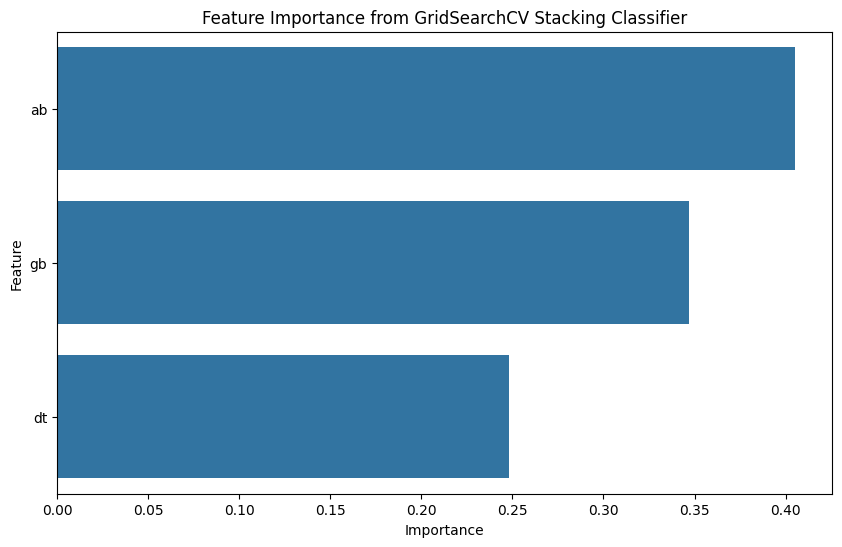

In [ ]:
importances = grid_search.best_estimator_.final_estimator_.feature_importances_
feature_names = [est[0] for est in base_models]

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)
# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from GridSearchCV Stacking Classifier')
plt.show()

**Evaluation**

Confusion Matrix:
[[963  89]
 [203 153]]


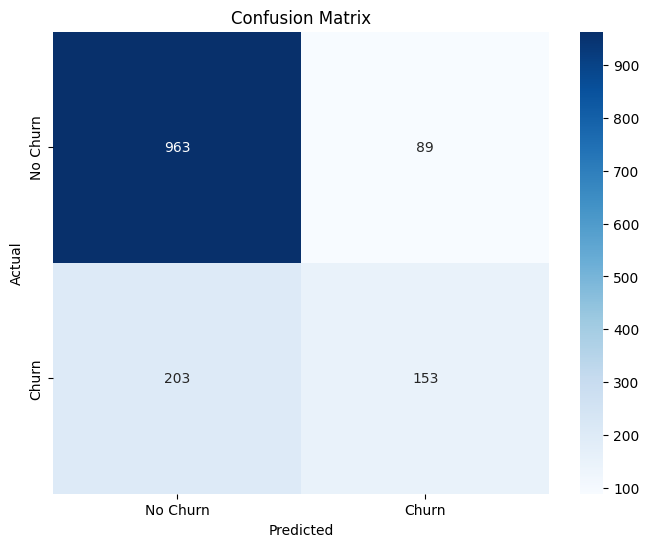

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1052
           1       0.63      0.43      0.51       356

    accuracy                           0.79      1408
   macro avg       0.73      0.67      0.69      1408
weighted avg       0.78      0.79      0.78      1408



In [ ]:
# Predict on the validation set using the best estimator from GridSearchCV
y_pred = grid_search.best_estimator_.predict(x_val)

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

In the context of churn prediction, recall is usually the most important metric. This is because the consequences of a false negative (failing to predict a customer will churn) are much greater than a false positive (incorrectly predicting a customer will churn).
Why Recall is Important?

 - Prevent customer loss: With high recall, companies can more effectively identify potentially churning customers and take action to retain them.
 - Increase revenue: By retaining potentially churn customers, companies can maintain existing revenue and even increase it.

**Reference**

1. https://www.kaggle.com/datasets/blastchar/telco-customer-churn
2. https://xbe.at/
3. https://scikit-learn.org/stable/supervised_learning.html
4. https://www.analyticsvidhya.com/